__Galaxies__

In this example, we'll use 'mass_profiles' and 'light_profiles' modules introduced previously, along with the 'galaxy' module to create Galaxy objects in PyAutoLens. We'll see that:

1) Galaxies can be made from multiple light-profiles and mass-profiles.

2) By taking multiple components, the summed image / deflection angle's of the profiles are computed.

3) Galaxies have redshifts, defining where they are relative to one another in lensing calculations.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

/home/shubham/Desktop/GSoC 2020/autolens_workspace/howtolens/chapter_1_introduction/../../config/priors.json


Lets use an identical grid to the previous example.

In [2]:
grid = al.grid.uniform(
    shape_2d=(100, 100), pixel_scales=0.05, sub_size=2
)

Lets make a galaxy with a Sersic light profile, by making a Sersic light profile and pasing it to a Galaxy object.

In [3]:
sersic_light_profile = al.lp.EllipticalSersic(
    centre=(0.0, 0.0),
    axis_ratio=0.8,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

galaxy_with_light_profile = al.Galaxy(redshift=0.5, light=sersic_light_profile)

print(galaxy_with_light_profile)

Redshift: 0.5
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In the previous example, we passed grids to the light-profile module to compute its image. We can do the exact same with galaxies, to again compute the galaxy's image.

In [4]:
galaxy_image = galaxy_with_light_profile.profile_image_from_grid(
    grid=grid, 
)

print("intensity of grid pixel 0:")
print(galaxy_image.in_2d[0, 0])
print("intensity of grid pixel 1:")
print(galaxy_image.in_2d[0, 1])
print("intensity of grid pixel 2:")
print(galaxy_image.in_2d[0, 2])
print("etc.")

intensity of grid pixel 0:
0.03314307774883969
intensity of grid pixel 1:
0.033685549632667316
intensity of grid pixel 2:
0.034236758603137026
etc.


A galaxy plotter allows us to the plot the image, just like the profile plotters did for a light profile.

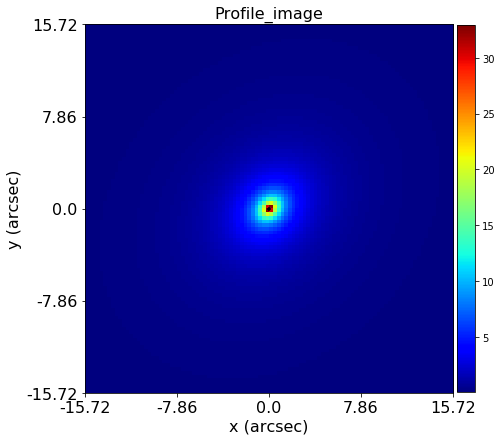

In [5]:
aplt.galaxy.profile_image(
    galaxy=galaxy_with_light_profile, grid=grid
)

We can pass galaxies as many profiles as we like. Lets create a galaxy with three light profiles.

In [6]:
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

galaxy_with_3_light_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
)

print(galaxy_with_3_light_profiles)

Redshift: 0.5
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
SphericalSersic
centre: (1.0, 1.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 3.0
SphericalSersic
centre: (1.0, -1.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 2.0


If we plot the galaxy, we see 3 blobs of light!

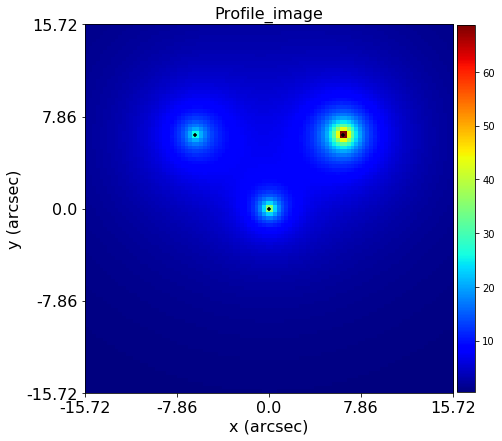

In [7]:
aplt.galaxy.profile_image(
    galaxy=galaxy_with_3_light_profiles, grid=grid
)

We can also plot each individual light profile using the 'subplot' galaxy plotter.

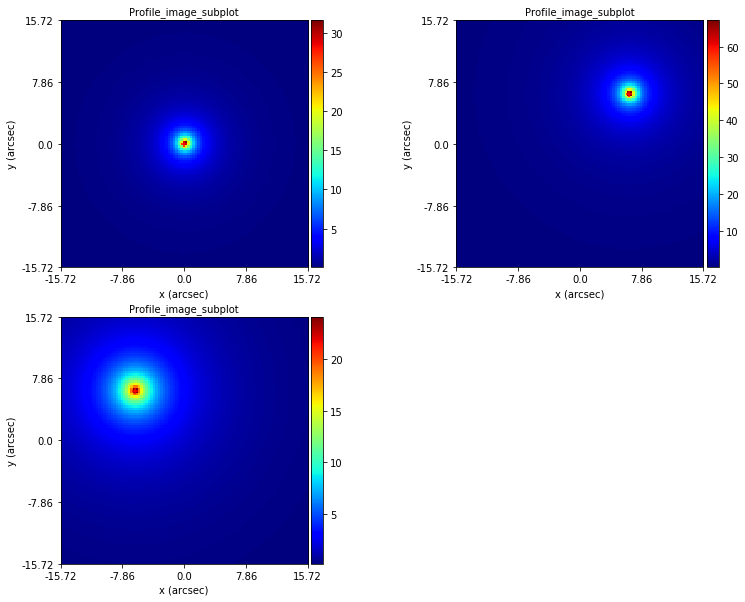

In [8]:
aplt.galaxy.profile_image_subplot(
    galaxy=galaxy_with_3_light_profiles, grid=grid
)

Mass profiles interact with Galaxy objects in the exact same way as light profiles. Lets create a galaxy with three SIS mass profiles. 

In [9]:
mass_profile_1 = al.mp.SphericalIsothermal(
    centre=(0.0, 0.0), einstein_radius=1.0
)

mass_profile_2 = al.mp.SphericalIsothermal(
    centre=(1.0, 1.0), einstein_radius=1.0
)

mass_profile_3 = al.mp.SphericalIsothermal(
    centre=(1.0, -1.0), einstein_radius=1.0
)

galaxy_with_3_mass_profiles = al.Galaxy(
    redshift=0.5, mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3
)

print(galaxy_with_3_mass_profiles)

Redshift: 0.5
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, 1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, -1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


We can use a galaxy plotter to plot these deflection angles. (Deflection angles of mass-profiles add together just like the light-profile image's above)

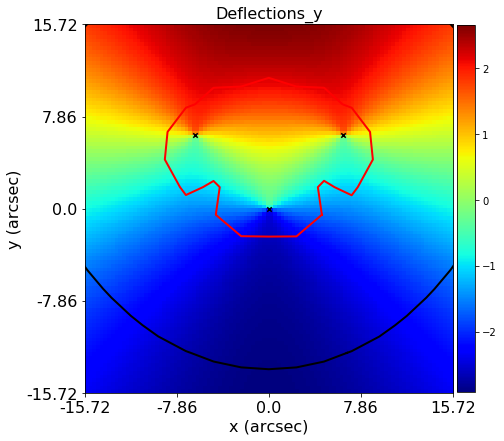

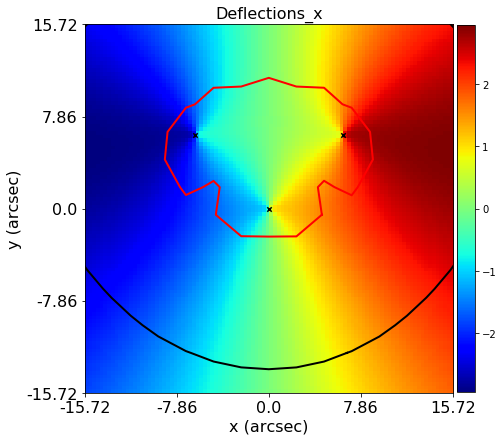

In [10]:
aplt.galaxy.deflections_y(
    galaxy=galaxy_with_3_mass_profiles, grid=grid
)

aplt.galaxy.deflections_x(
    galaxy=galaxy_with_3_mass_profiles, grid=grid
)

I wonder what 3 summed convergence maps or potential's look like ;)

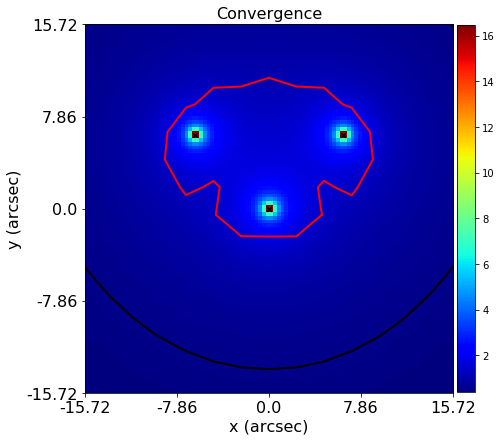

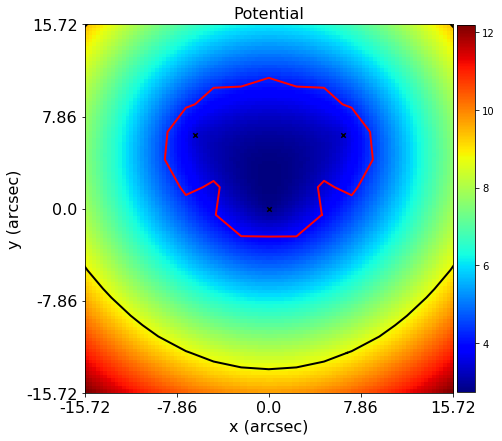

In [11]:
aplt.galaxy.convergence(
    galaxy=galaxy_with_3_mass_profiles, grid=grid
)

aplt.galaxy.potential(
    galaxy=galaxy_with_3_mass_profiles, grid=grid
)

Finally, a galaxy can take both light and mass profiles, and there is no limit to how many we pass it.

In [12]:
light_profile_1 = al.lp.SphericalSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

light_profile_2 = al.lp.SphericalSersic(
    centre=(1.0, 1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0
)

light_profile_3 = al.lp.SphericalSersic(
    centre=(2.0, 2.0), intensity=1.0, effective_radius=3.0, sersic_index=3.0
)

light_profile_4 = al.lp.EllipticalSersic(
    centre=(1.0, -1.0),
    axis_ratio=0.5,
    phi=45.0,
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=1.0,
)

mass_profile_1 = al.mp.SphericalIsothermal(
    centre=(0.0, 0.0), einstein_radius=1.0
)

mass_profile_2 = al.mp.SphericalIsothermal(
    centre=(1.0, 1.0), einstein_radius=2.0
)

mass_profile_3 = al.mp.SphericalIsothermal(
    centre=(2.0, 2.0), einstein_radius=3.0
)

mass_profile_4 = al.mp.EllipticalIsothermal(
    centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, einstein_radius=2.0
)

galaxy_with_many_profiles = al.Galaxy(
    redshift=0.5,
    light_1=light_profile_1,
    light_2=light_profile_2,
    light_3=light_profile_3,
    light_4=light_profile_4,
    mass_1=mass_profile_1,
    mass_2=mass_profile_2,
    mass_3=mass_profile_3,
    mass_4=mass_profile_4,
)

Suffice to say, the galaxy's images, convergence, potential and deflections look pretty interesting.

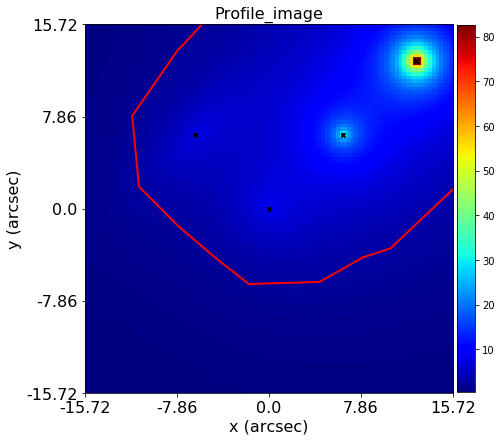

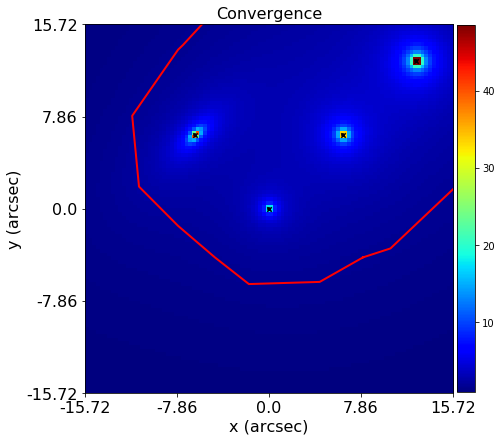

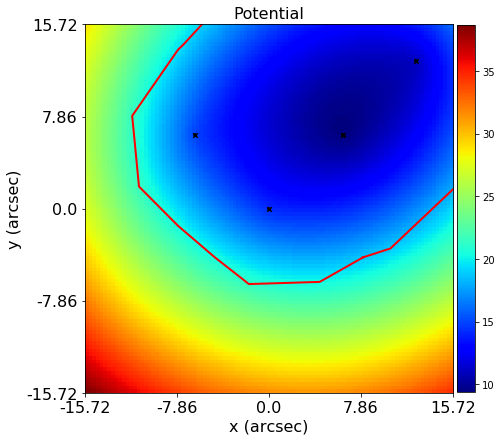

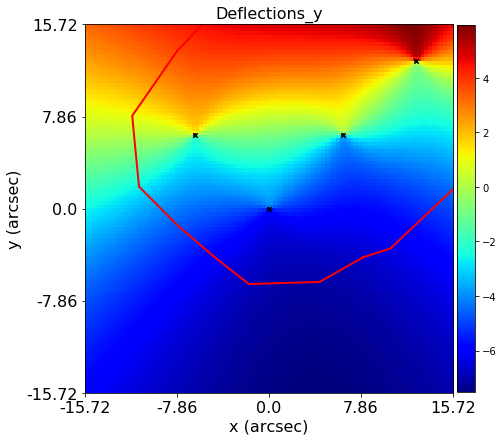

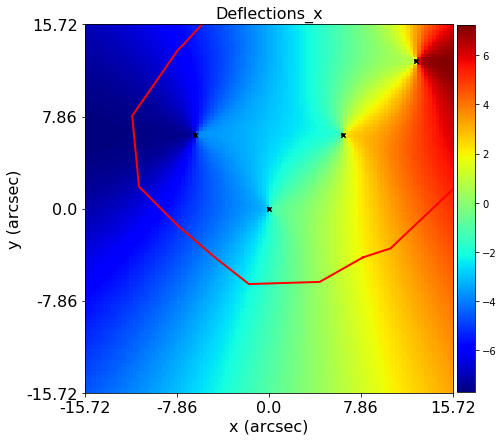

In [13]:
aplt.galaxy.profile_image(
    galaxy=galaxy_with_many_profiles, grid=grid
)

aplt.galaxy.convergence(
    galaxy=galaxy_with_many_profiles, grid=grid
)

aplt.galaxy.potential(
    galaxy=galaxy_with_many_profiles, grid=grid
)

aplt.galaxy.deflections_y(
    galaxy=galaxy_with_many_profiles, grid=grid
)

aplt.galaxy.deflections_x(
    galaxy=galaxy_with_many_profiles, grid=grid
)

And we're done. Lets finished by just thinking about one question:

1) We've learnt we can group profiles into galaxies, to essentially sum the contribution of each light profile to the galaxy image's intensity, or sum the contribution of each mass profile to the convergence, potential and deflection angles. In strong lensing, there are often multiple galaxies next to one another responsible for the lensing - how might we account for this?